In [244]:
import numpy as np
import pandas as pd
import scipy

from statsmodels.stats.weightstats import *
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import chi2_contingency

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [245]:
data = pd.read_csv('churn_analysis.csv', sep=',')

In [246]:
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


Удалим колонку с индексами, перезаписав датафрейм

In [247]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [248]:
data.describe()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.990999,0.484236
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.819138,0.138560
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.390000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000,0.480000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,2.000000,0.580000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,2.000000,0.960000


## Task 1

In [249]:
ctrl = data[data['treatment']==1]

In [250]:
cols_to_check = ['state', 'churn']

In [253]:
table_sc = ctrl[cols_to_check]

In [254]:
table_sc.head()

,state,churn
0,KS,False.
3,OH,False.
8,LA,False.
12,IA,False.
17,VT,False.


In [255]:
table_sc.state.value_counts().head()

NY    33
WV    32
AL    30
CT    30
NM    29
Name: state, dtype: int64

In [256]:
table_sc.churn.value_counts()

False.    917
True.     180
Name: churn, dtype: int64

In [271]:
states = table_sc.state.drop_duplicates()

In [263]:
subtables_list = []

for i, state1 in enumerate(states):
    for j, state2 in enumerate(states):
        if i>=j:
            continue
            
        state1_true_num = table_sc[(table_sc['state']==state1) & (table_sc['churn']=='True.')].shape[0]
        state1_false_num = table_sc[(table_sc['state']==state1) & (table_sc['churn']=='False.')].shape[0]
        
        state2_true_num = table_sc[(table_sc['state']==state2) & (table_sc['churn']=='True.')].shape[0]
        state2_false_num = table_sc[(table_sc['state']==state2) & (table_sc['churn']=='False.')].shape[0]
        
        subtable = np.array([[state1_true_num, state1_false_num],
                             [state2_true_num, state2_false_num]])
            
        res = chi2_contingency(subtable, correction=False)
        subtables_list.append([state1, state2, res[1]])

In [264]:
summary_total = pd.DataFrame.from_records(subtables_list)
summary_total.columns = ['State 1', 'State 2', 'p-value']
summary_total.head()

,State 1,State 2,p-value
0,KS,OH,0.075524
1,KS,LA,0.024052
2,KS,IA,0.282190
3,KS,VT,0.616769
4,KS,CO,0.679125


In [265]:
print "Количество достигаемых уровней значимости меньше 0.05: %d" % summary_total[summary_total['p-value']<0.05].shape[0]

Количество достигаемых уровней значимости меньше 0.05: 34


In [266]:
(summary_total['p-value']<0.05).value_counts()

False    1241
True       34
Name: p-value, dtype: int64

In [267]:
summary_total['p-value'].describe()

count    1275.000000
mean        0.501827
std         0.279722
min         0.014306
25%         0.261811
50%         0.495521
75%         0.732278
max         1.000000
Name: p-value, dtype: float64

In [332]:
1

1

## Task 2

Построим таблицу сопряженности по всей таблице

In [272]:
table = table_sc['state'].groupby([table_sc['state'],table_sc['churn']]).count().unstack(1)

In [279]:
table.head()

churn,False.,True.
state,,
AK,19.0,1.0
AL,25.0,5.0
AR,11.0,5.0
AZ,17.0,2.0
CA,10.0,5.0


In [282]:
sum(isnan(table))

churn
False.    0
True.     1
dtype: int64

In [284]:
table = table.fillna(0)

In [285]:
table.shape[0]

51

In [286]:
a = table['False.'].sum()
b = table['True.'].sum()
a + b

1097.0

In [288]:
res1 = chi2_contingency(table, correction='false')
round(res1[1],5)

0.70976

1) Интерпретация числа достигаемых уровней значимости, меньших α=0.05, некорректна, поскольку не сделана поправка на множественную проверку гипотез.

2) Анализ нужно было начинать с применения xи-квадрат к таблице сопряженности, в которой присутствовали сразу все возможные штаты. Достигаемой уровень значимости такой проверки = 0.7, что дает нам гарантию, что нет ни одной пары штатов, в которых отличие в соотношениях ушедших и оставшихся клиентов статистически значимо.

In [289]:
0.8

0.8

In [333]:
0.6

0.6

## Task 3

In [291]:
subtables_list1 = []

for i, state1 in enumerate(states):
    for j, state2 in enumerate(states):
        if i>=j:
            continue
            
        state1_true_num = table_sc[(table_sc['state']==state1) & (table_sc['churn']=='True.')].shape[0]
        state1_false_num = table_sc[(table_sc['state']==state1) & (table_sc['churn']=='False.')].shape[0]
        
        state2_true_num = table_sc[(table_sc['state']==state2) & (table_sc['churn']=='True.')].shape[0]
        state2_false_num = table_sc[(table_sc['state']==state2) & (table_sc['churn']=='False.')].shape[0]
        
        subtable = np.array([[state1_true_num, state1_false_num],
                             [state2_true_num, state2_false_num]])
            
        res = chi2_contingency(subtable, correction=True)
        subtables_list1.append([state1, state2, res[1], res[0]])

In [292]:
summary_1 = pd.DataFrame.from_records(subtables_list1)
summary_1.columns = ['State 1', 'State 2', 'p-value', 'chi2_stat']
summary_1.head()

,State 1,State 2,p-value,chi2_stat
0,KS,OH,0.159054,1.983196
1,KS,LA,0.067770,3.336219
2,KS,IA,0.493752,0.468339
3,KS,VT,0.867518,0.027826
4,KS,CO,0.937468,0.006155


In [293]:
round(summary_total['p-value'].mean(),4)

0.5018

In [294]:
round(summary_1['p-value'].mean(),4)

0.6641

In [297]:
print "Количество достигаемых уровней значимости меньше 0.05: %d" % summary_1[summary_1['p-value']<0.05].shape[0]

Количество достигаемых уровней значимости меньше 0.05: 0


1) Количество достигаемых уровней значимости, меньших, чем 0.05, в точности равно нулю. То есть поправка увеличила достигаемые уровни значимости настолько, что больше ни одно из значений достигаемого уровня значимости не попадает в диапазон от 0 до 0.05.

2) Достигаемые уровни значимости на наших данных, полученные с помощью критерия xи-квадрат с поправкой Йетса, в среднем получаются больше, чем соответствующие значения без поправки.

In [334]:
1

1

## Task 4

In [303]:
summary_total['p-value Yates'] = summary_1['p-value']

In [304]:
summary_total.head()

,State 1,State 2,p-value,p-value Yates
0,KS,OH,0.075524,0.159054
1,KS,LA,0.024052,0.067770
2,KS,IA,0.282190,0.493752
3,KS,VT,0.616769,0.867518
4,KS,CO,0.679125,0.937468


In [305]:
sum(summary_total['p-value Yates']>summary_total['p-value'])

1054

In [307]:
subtables_list2 = []

for i, state1 in enumerate(states):
    for j, state2 in enumerate(states):
        if i>=j:
            continue
            
        state1_true_num = table_sc[(table_sc['state']==state1) & (table_sc['churn']=='True.')].shape[0]
        state1_false_num = table_sc[(table_sc['state']==state1) & (table_sc['churn']=='False.')].shape[0]
        
        state2_true_num = table_sc[(table_sc['state']==state2) & (table_sc['churn']=='True.')].shape[0]
        state2_false_num = table_sc[(table_sc['state']==state2) & (table_sc['churn']=='False.')].shape[0]
        
        subtable = np.array([[state1_true_num, state1_false_num],
                             [state2_true_num, state2_false_num]])
            
        res = scipy.stats.fisher_exact(subtable)
        subtables_list2.append([state1, state2, res[1]])

In [308]:
summary_2 = pd.DataFrame.from_records(subtables_list2)
summary_2.columns = ['State 1', 'State 2', 'p-value']
summary_2.head()

,State 1,State 2,p-value
0,KS,OH,0.138333
1,KS,LA,0.032840
2,KS,IA,0.440083
3,KS,VT,0.743389
4,KS,CO,0.747108


In [309]:
summary_total['p-value Fisher'] = summary_2['p-value']
summary_total.head()

,State 1,State 2,p-value,p-value Yates,p-value Fisher
0,KS,OH,0.075524,0.159054,0.138333
1,KS,LA,0.024052,0.067770,0.032840
2,KS,IA,0.282190,0.493752,0.440083
3,KS,VT,0.616769,0.867518,0.743389
4,KS,CO,0.679125,0.937468,0.747108


In [310]:
round(summary_total['p-value Fisher'].mean(),4)

0.6483

1) Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем значительно большие, чем xи-квадрат без поправки

2) Точный критерий Фишера всегда лучше, чем критерий xи-квадрат, потому что не использует аппроксимацию дискретного распределения непрерывным. Однако при увеличении размера выборки его преимущества по сравнению с критерем xи-квадрат уменьшаются, в пределе достигая нуля.

3) Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем меньшие, чем xи-квадрат с поправкой Йетса

In [335]:
1

1

## Task 5

In [312]:
data5 = data[['day_calls','mes_estim']]

In [313]:
corr, pp = scipy.stats.pearsonr(data5.day_calls,data5.mes_estim)

print "Pearson's correlation value is: %f" % corr
print "P-Value: %f" % pp

Pearson's correlation value is: -0.051794
P-Value: 0.002780


Корреляция Пирсона имеет отрицательный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.

In [314]:
1

1

## Task 6

In [315]:
corr, sp = scipy.stats.spearmanr(data5.day_calls,data5.mes_estim)

print "Spearman's correlation value is: %f" % corr
print "P-Value: %f" % sp

Spearman's correlation value is: 0.043350
P-Value: 0.012317


Корреляция Спирмена имеет положительный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.

In [316]:
1

1

## Task 7

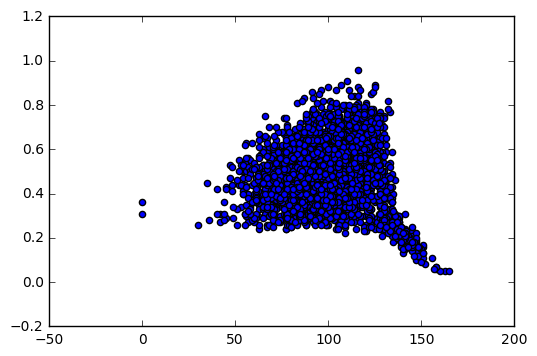

In [325]:
plt.scatter(data5.day_calls,data5.mes_estim)

1) Посчитанные корреляции и их значимости говорят лишь о том, что необходимо взглянуть на данные глазами и попытаться понять, что приводит к таким (противоречивым?) результатам.

In [336]:
1

1

## Task 8

In [327]:
VC = np.sqrt(res1[0]/data.shape[0])

In [328]:
print "Cramer's correlation value is: %f" % VC

Cramer's correlation value is: 0.114966


In [329]:
dd = int((table.shape[0]-1)*(table.shape[1]-1))
scipy.stats.chi2.sf(res1[0], dd)

0.70975900427784411

1) Для вычисления коэффициента Крамера используется значение статистики xи-квадрат, на которую мы не можем положиться применительно к нашим данным.

In [337]:
1

1

## Task 9

In [331]:
tr0 = data[data['treatment']==0]
tr2 = data[data['treatment']==2]

In [243]:
0

0